<a href="https://colab.research.google.com/github/nitinarya2001/Web-Developement-Project/blob/main/us_accident_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accident-notebook')
jovian.set_colab_id('1boqpfpNu5HZ9M3EE3519L-8fcUfEcAWX')

# us-accident-notebook

Use the "Run" button to execute the code.

# US Accident Exploratory Data - Analysis

TODO - talk about EDA

TODO - talk about data set(Source,What it Contains,How it will useful
  - Kaggle
  - Information about accidents
  - useful to prevent accidents
  - Mention that this does not contain data about New York 


In [1]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aryanit2001
Your Kaggle Key: ··········


  0%|          | 0.00/290M [00:00<?, ?B/s]

100%|██████████| 290M/290M [00:10<00:00, 27.8MB/s]


In [5]:
data_filename = './us-accidents/US_Accidents_Dec20_Updated.csv'

## Data Prepration and Cleaning
- Load the file using Pandas
- Look at some information about the data and columns
- fix any missing or incoreect values




In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(data_filename)

In [ ]:
df

In [ ]:
df.columns

In [ ]:
len(df.columns)

In [ ]:
df.describe()

In [12]:
numerics = ['int16','int32','int64','float16','float32','float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

Percentage of missing values per column

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False)/ len(df)
missing_percentages

In [15]:
missing_percentages[missing_percentages != 0]

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
dtype: float64

In [16]:
type(missing_percentages)

pandas.core.series.Series

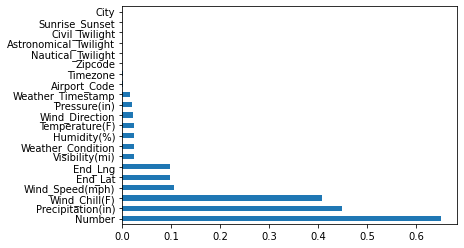

In [17]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh')

Remove columns that you don't want to use.

## Exploratory Analysis And Visualization
Columns we will ananlyze

1. City
2. Start_Time


In [ ]:
df.columns

### City

In [ ]:
df.City

In [20]:
df.City.unique()

array(['Greenville', 'Charlotte', 'Los Gatos', ..., 'Allons', 'Adolphus',
       'Gowanda'], dtype=object)

In [21]:
Cities = df.City.unique()
len(Cities)

11790

In [22]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles        68411
Houston            68265
Charlotte          56176
Miami              49965
Dallas             48525
                   ...  
Prairie Village        1
Shell                  1
Geraldine              1
Farmerville            1
Copper Hill            1
Name: City, Length: 11789, dtype: int64

In [23]:
cities_by_accident[:10]

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
Austin         38808
Raleigh        31355
Atlanta        29244
Sacramento     28984
Orlando        28092
Name: City, dtype: int64

In [24]:
'New York' in df.City

False

New York data is not present in data analysis .

Among the top 100 city in number of accidents,Los Angeles city do they belong to most frequently .


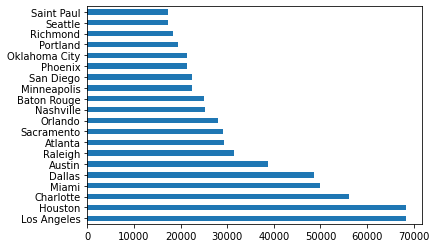

In [25]:
cities_by_accident[:20].plot(kind = 'barh')

In [26]:
import seaborn as sns
sns.set_style('darkgrid')

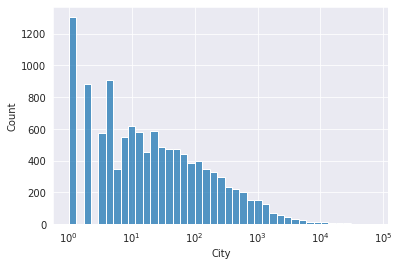

In [27]:
sns.histplot(cities_by_accident,log_scale=True)

In [28]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [29]:
len(high_accident_cities) / len(Cities)


0.04351145038167939

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


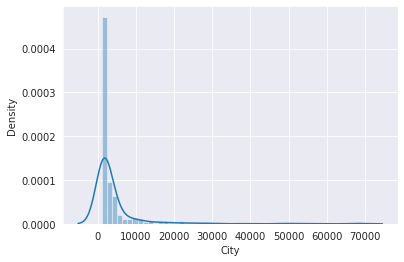

In [30]:
sns.distplot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


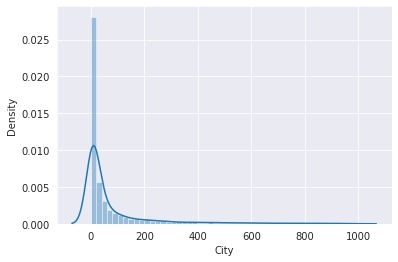

In [31]:
sns.distplot(low_accident_cities)

In [32]:
cities_by_accident[cities_by_accident == 1]

Cooper             1
Blanchardville     1
Camp Meeker        1
Springtown         1
Jena               1
                  ..
Prairie Village    1
Shell              1
Geraldine          1
Farmerville        1
Copper Hill        1
Name: City, Length: 1306, dtype: int64

### Start-Time

In [33]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [34]:
df.Start_Time = pd.to_datetime(df.Start_Time)

How to figure out percentage

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


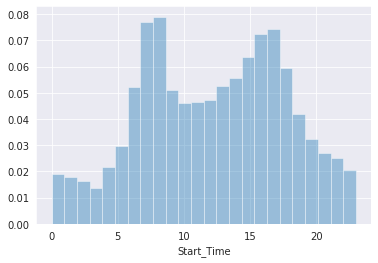

In [35]:
sns.distplot(df.Start_Time.dt.hour,bins = 24, kde = False,norm_hist=True)

A high percentage of accident is occur in 6 am to 9 am
Next highest percentage is 3 pm to 6 pm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


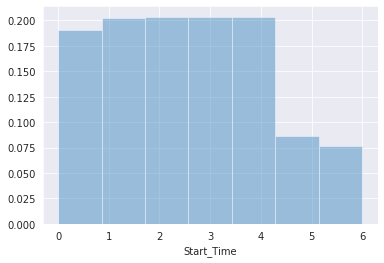

In [36]:
sns.distplot(df.Start_Time.dt.dayofweek,bins = 7, kde = False,norm_hist=True)

in Weekdays Most accident occured

Is the distribution of accidents by hour the same on weekends as on Weekdays ?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


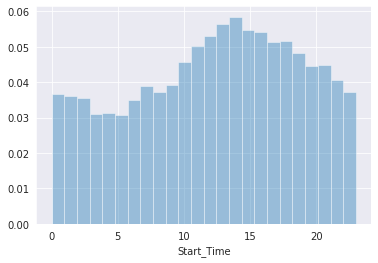

In [37]:
Sundays_Start_Time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(Sundays_Start_Time.dt.hour,bins = 24, kde = False,norm_hist=True)

In Sunday Mostly Accident occur between 1 PM to 3 PM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


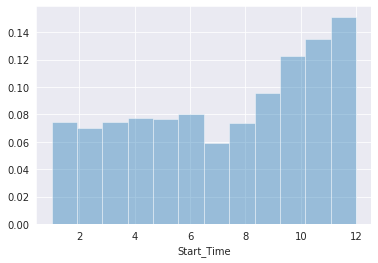

In [38]:
sns.distplot(df.Start_Time.dt.month,bins = 12, kde = False,norm_hist=True)

In December Month, Mostly accident Occur

Much data is missing in 2016 , Maybe 2017

Trend is increses over year and year

There is some issue with Bing Data 

In [39]:
df.Start_Time.dt.year

0          2019
1          2019
2          2020
3          2018
4          2016
           ... 
2906605    2018
2906606    2019
2906607    2020
2906608    2019
2906609    2018
Name: Start_Time, Length: 2906610, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


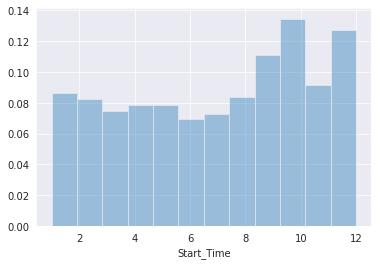

In [40]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month,bins = 12, kde = False,norm_hist=True)

## Ask and Answer Question

1. Does New York show up in data? if yes, why is the count lower if it have maximum population ? -- ANSWERED
2. Among the top 100 city in number of accidents,Which city do they belong to most frequently? --ANSWERED
3. What time of the day are most accident frequent in? -- ANSWERED
4. Which day have the most accidents ? -- ANSWERED
5. Which Month have the most accidents?  -- ANSWERED
6. What is the trend of accident increase over year(Increasing/decreasing)? -- ANSWERED


## Summary and Conclusion
1. No data for New York
2. Less than 5% cities have more than than 1000 yearly accident.
3. over 1300 cities have just reported one accident .(need to investigate)
4. Number of accidents  er city decrease exponentially
